# VALIDATION OF PyDICE - Part 2

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import os 
os.chdir(os.getcwd())

from PyDICE_V4 import PyDICE

clr_palette = ([sns.color_palette("YlGn", 15)[10],sns.cubehelix_palette(8)[6]])

In [10]:
dice_sm = PyDICE(model_specification='EMA')

In [11]:
dice_sm()

{'Atmospheric Temperature 2010': 0.8,
 'Damages 2010': 0.10864889907654762,
 'Utility 2010': -3689.7501287127907,
 'Total Output 2010': 63.47310655405873,
 'Atmospheric Temperature 2050': 1.9260615925348423,
 'Damages 2050': 2.0202488073062326,
 'Utility 2050': -1859.0726569562228,
 'Total Output 2050': 201.510077404276,
 'Atmospheric Temperature 2100': 3.1518894496168426,
 'Damages 2100': 13.82228308190873,
 'Utility 2100': 242.16586268997708,
 'Total Output 2100': 502.7229938380475,
 'Atmospheric Temperature 2150': 3.3509629519900206,
 'Damages 2150': 29.345133316146065,
 'Utility 2150': 1508.04809741597,
 'Total Output 2150': 935.3368715407495,
 'Atmospheric Temperature 2200': 2.3817513558439374,
 'Damages 2200': 23.5135586908872,
 'Utility 2200': 2176.7044614464594,
 'Total Output 2200': 1517.2678851033263,
 'Atmospheric Temperature 2300': 0.326048844990458,
 'Damages 2300': 0.8053315999384726,
 'Utility 2300': 2678.0981457031994,
 'Total Output 2300': 2830.614287991369}

In [12]:
dice_opt = pd.read_excel("DICE2013R.xlsm" ,sheet_name = "Opttax", index_col = 0)

In [13]:
dice_om_plot = [np.array(dice_opt.iloc[133]), 
                np.array(dice_opt.iloc[126]),
                np.array(dice_opt.iloc[110]),
                np.array(dice_opt.iloc[97]),
                np.array(dice_opt.iloc[104]),
                np.array(dice_opt.iloc[108])]

dice_sm_plot = [dice_sm.miu,
                dice_sm.per_util,
                dice_sm.e,
                dice_sm.temp_atm,
                dice_sm.damages,
                dice_sm.y]

title_list = ['Emission Control Rate', 'Per Period Utility', 'Emission', 'Atmospheric Temperature', 'Damage', 'Total Output']

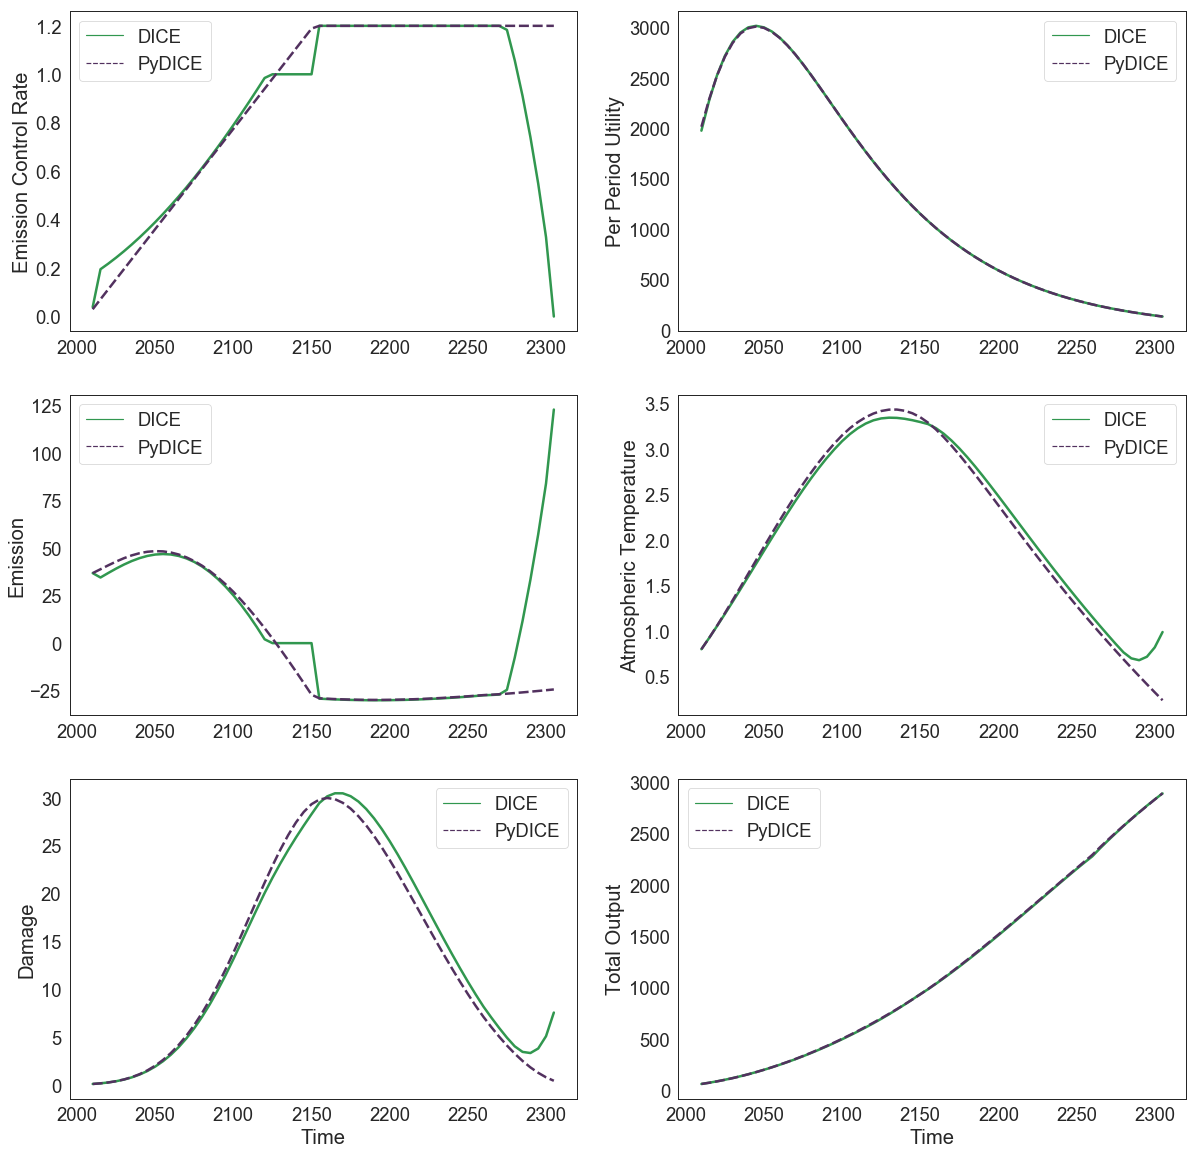

In [19]:
sns.set("paper", "white", font_scale=2.1)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

for i in range (3):
    for j in range (2):
        #axes[i,j].set_title(title_list[2*i+j])
        sns.lineplot(data = pd.DataFrame([dice_om_plot[2*i+j], dice_sm_plot[2*i+j]], 
                                         index = ["DICE", "PyDICE"], columns=list(range(2010,2310,5))).T, 
                     linewidth = 2.5, palette=clr_palette, ax=axes[i,j])
        axes[i,j].set_ylabel(title_list[2*i+j])
        axes[2,j].set_xlabel("Time")
        
plt.show()

In [20]:
fig.savefig('PyDICE_Validation_Outcomes.png', bbox_inches = "tight")

In [16]:
validDF = pd.DataFrame()
for i in range (3):
    for j in range (2):
        arrays = [[title_list[2*i+j],title_list[2*i+j]],["DICE", "PyDICE"]]
        tuples = list(zip(*arrays))
        index = pd.MultiIndex.from_tuples(tuples)
        data = pd.DataFrame([dice_om_plot[2*i+j], dice_sm_plot[2*i+j]], 
                            index = index, 
                            columns=list(range(2010,2310,5))).T
        validDF = pd.concat([validDF,data], axis=1)

In [17]:
validDF.to_excel('PyDICE_Validation_Outcomes.xlsx')